# Projeto 2 - Métodos de Aprendizagem Supervisionada

### Grupo
- Ismael Pereira Santos de Melo - RA175460
- Willian Massahiro Hayashida - RA188705


# PART I - Regression Task

## Loading Data

### Visualizing kicks

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

from math import sqrt

Kick1 = pd.read_csv('data/kick1.dat', delimiter=' ', names=['x', 'y','z'])
Kick2 = pd.read_csv('data/kick2.dat', delimiter=' ', names=['x', 'y','z'])

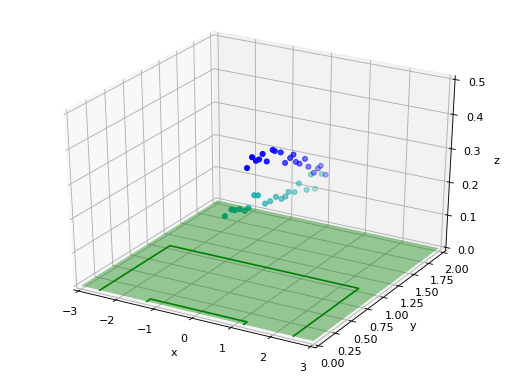

In [2]:
%matplotlib inline
fig = plt.figure(figsize=(8, 6), dpi=80)

ax = plt.axes(projection="3d")
ax.scatter3D(Kick1.x, Kick1.y, Kick1.z, c='#10a9a9');
ax.scatter3D(Kick2.x, Kick2.y, Kick2.z, c='b');

X_field,Y_field = np.meshgrid(np.linspace(-3,3,4), np.linspace(0,2,2))
Z_field = np.zeros(X_field.shape)
ax.plot_surface(X_field,Y_field,Z_field,shade=False, color='g', alpha=0.4)
ax.plot([-2.5 , -2.5, 2.5, 2.5], [0, 1, 1, 0], zdir ='z', zs=0, c='g')
ax.plot([-1.25, -1.25, 1.25, 1.25], [0, 0.05, 0.05, 0], zdir ='z', zs=0, c='g')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(-3, 3)
ax.set_ylim(0 ,2)
ax.set_zlim(0, 0.5)

plt.show()

### Initializing variables

In [3]:
kick_data = []

X = Kick1.x.values
Y = Kick1.y.values
Z = Kick1.z.values

kick_data.append({
    'X' : {
        'data' : X,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polynomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
    'Y' : {
        'data' : Y,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polynomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
    'Z' : {
        'data' : Z,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polynomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
})

X = Kick2.x.values
Y = Kick2.y.values
Z = Kick2.z.values

kick_data.append({
    'X' : {
        'data' : X,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polynomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
    'Y' : {
        'data' : Y,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polynomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
    'Z' : {
        'data' : Z,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polynomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
})

In [4]:
kick_data[0]['X']['data']

array([-0.21 , -0.305, -0.368, -0.37 , -0.48 , -0.532, -0.575, -0.583,
       -0.618, -0.702, -0.783, -0.842, -0.882, -0.93 , -0.969, -0.989,
       -1.032, -1.088, -1.104, -1.192])

## Stochastic Gradient Descent

In [5]:
def stochasticGradientDescent(X_b, y, lr='opt', eta0=0.001, n_epochs=50, tol=0.0005):
    m = X_b.shape[0] 
    #   cost = np.zeros(n_epochs)
    cost = []
    X_b = np.c_[np.ones((X_b.shape[0], 1)), X_b] 
    #   theta = np.random.rand(X_b.shape[1])
    theta = np.zeros(X_b.shape[1])
    
#     X_b, y = shuffle(X_b, y)
    cost_func = 100000
    for epoch in range(n_epochs):
        if cost_func < tol:
            break

        for i in range(m):
            xi = X_b[i: i+1]
            yi = y[i: i+1]

            # calculate its gradient
            loss = xi[0].dot(theta) - yi
            gradients = xi.T.dot(loss)
            
    #       print(xi[0].dot(theta))
    #       print('loss: ', loss, ' xi: ', xi, ' grad: ', gradients)
    #       gradients = xi[0].T * loss

            alpha = eta0
            # update parameters
#             if(lr == 'opt'):
#                 alpha = 1.0 * eta0 / (1 + np.log(epoch+1))

            theta = theta - alpha * gradients

        # calculate the cost function
        cost_func = (loss ** 2)/2
        cost.append(cost_func)

    return theta, cost

## Batch Gradient Descent

In [23]:
def gradientDescent(X_b, y, lr='opt', eta0=0.005, n_epochs=50, tol=0.01):
    m = X_b.shape[0] 
    cost = []
    X_b = np.c_[np.ones((X_b.shape[0], 1)), X_b] 
    theta = np.zeros(X_b.shape[1])
    #     theta = np.random.rand(X_b.shape[1])
    X_b, y = shuffle(X_b, y)
    cost_func = 100000
    for epoch in range(n_epochs):
        if cost_func < tol:
            break
    
        # calculate its gradient
        loss = X_b.dot(theta) - y
        gradients = X_b.T.dot(loss) / m
        
        alpha = eta0
      # update parameters
#         if(lr == 'opt'):
#             alpha = 1.0 * eta0 / (10 + m * (epoch/25 + 10))
        
        theta = theta - alpha * gradients
      
        #calculate the cost function
        cost_func = (np.sum(loss) ** 2)/2
        cost.append(cost_func)
 
    return theta, cost

## Training - Linear Regression

In [7]:
t = np.linspace(1, 5, 20)
# t = t / 4

t = np.c_[t, t**2]

t

array([[ 1.        ,  1.        ],
       [ 1.21052632,  1.46537396],
       [ 1.42105263,  2.01939058],
       [ 1.63157895,  2.66204986],
       [ 1.84210526,  3.3933518 ],
       [ 2.05263158,  4.2132964 ],
       [ 2.26315789,  5.12188366],
       [ 2.47368421,  6.11911357],
       [ 2.68421053,  7.20498615],
       [ 2.89473684,  8.37950139],
       [ 3.10526316,  9.64265928],
       [ 3.31578947, 10.99445983],
       [ 3.52631579, 12.43490305],
       [ 3.73684211, 13.96398892],
       [ 3.94736842, 15.58171745],
       [ 4.15789474, 17.28808864],
       [ 4.36842105, 19.08310249],
       [ 4.57894737, 20.966759  ],
       [ 4.78947368, 22.93905817],
       [ 5.        , 25.        ]])

### Stochastic Gradient Descent

In [31]:
n_epochs = 10000
tol = 1e-6

for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    for dim in kick_data[i]:
        starter_time = time.time()
        x = t[:,0]
        y = kick_data[i][dim]['data']
        theta, cost = stochasticGradientDescent(x, y, eta0=0.005, lr='opt', n_epochs=n_epochs, tol=tol) 
        time_1 = time.time() - starter_time

        num_iterations = len(cost)
        print("  training: ", dim)
        print("  - time of training linear regression with SGD: ", time_1)
        print("  - minimun cost: ", min(cost))
        print("  - num of iterations: ", num_iterations)
        print()

        kick_data[i][dim]['linear_model']['theta']['SGD'] = theta
        kick_data[i][dim]['linear_model']['cost']['SGD'] = cost



---------
Kick:  1  | index:  0
  training:  X
  - time of training linear regression with SGD:  0.009520292282104492
  - minimun cost:  [4.94721808e-06]
  - num of iterations:  114

  training:  Y
  - time of training linear regression with SGD:  0.028997182846069336
  - minimun cost:  [4.89100675e-06]
  - num of iterations:  333

  training:  Z
  - time of training linear regression with SGD:  0.7434952259063721
  - minimun cost:  [2.08157426e-05]
  - num of iterations:  10000

---------
Kick:  2  | index:  1
  training:  X
  - time of training linear regression with SGD:  0.0156252384185791
  - minimun cost:  [4.99992902e-06]
  - num of iterations:  375

  training:  Y
  - time of training linear regression with SGD:  0.0426332950592041
  - minimun cost:  [4.89100675e-06]
  - num of iterations:  333

  training:  Z
  - time of training linear regression with SGD:  0.7993659973144531
  - minimun cost:  [0.00071906]
  - num of iterations:  10000



### Batch Gradient Descent

In [32]:
n_epochs = 100000
tol = 1e-6
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    for dim in kick_data[i]:
        starter_time = time.time()
        x = t[:,0]
        y = kick_data[i][dim]['data']
        theta, cost = gradientDescent(x, y, eta0=0.005, lr='opt', n_epochs=n_epochs, tol=tol) 
        time_1 = time.time() - starter_time

        num_iterations = len(cost)
        print("training: ", dim)
        print("- time of training linear regression with GD: ", time_1)
        print("- minimun cost: ", min(cost))
        print("- num of iterations: ", num_iterations)
        print()

        kick_data[i][dim]['linear_model']['theta']['GD'] = theta
        kick_data[i][dim]['linear_model']['cost']['GD'] = cost

---------
Kick:  1  | index:  0
training:  X
- time of training linear regression with GD:  0.05864977836608887
- minimun cost:  9.997183486858703e-07
- num of iterations:  6731

training:  Y
- time of training linear regression with GD:  0.08931112289428711
- minimun cost:  9.99932407149963e-07
- num of iterations:  12763

training:  Z
- time of training linear regression with GD:  0.0734708309173584
- minimun cost:  9.997440904207899e-07
- num of iterations:  8272

---------
Kick:  2  | index:  1
training:  X
- time of training linear regression with GD:  0.001005411148071289
- minimun cost:  3.986386040332669e-08
- num of iterations:  88

training:  Y
- time of training linear regression with GD:  0.12017440795898438
- minimun cost:  9.99932407149963e-07
- num of iterations:  12763

training:  Z
- time of training linear regression with GD:  0.07812690734863281
- minimun cost:  9.989845006542033e-07
- num of iterations:  8209



### Cost Function - Linear Regression

Stochastic Gradient Descent - Cost Function
---------
Kick:  1  | index:  0


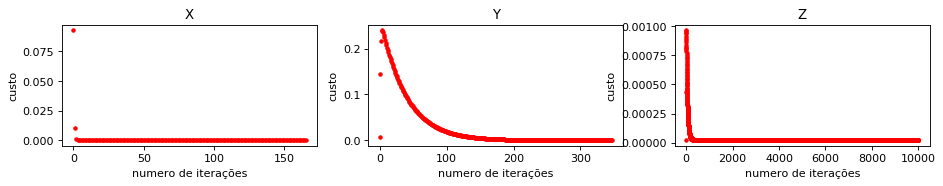

---------
Kick:  2  | index:  1


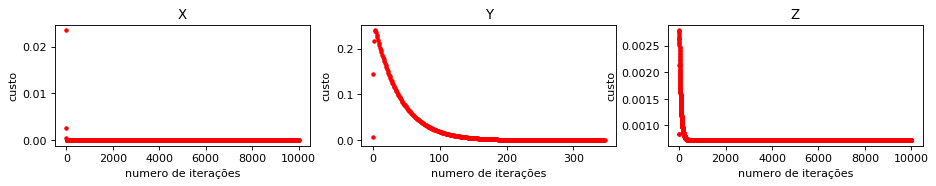

In [10]:
%matplotlib inline
print("Stochastic Gradient Descent - Cost Function")
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    fig = plt.figure(figsize=(14, 2), dpi=80)
    j = 1
    for dim in kick_data[i]:
        num_iterations = len(kick_data[i][dim]['linear_model']['cost']['SGD'])
        ax = plt.subplot(1, 3, j)
        ax.plot(np.arange(0,num_iterations), kick_data[i][dim]['linear_model']['cost']['SGD'], "r.")
        ax.set_ylabel('custo')
        ax.set_xlabel('numero de iterações')
        ax.set_title(dim)
        j = j + 1
    plt.show()

Batch Gradient Descent - Cost Function
---------
Kick:  1  | index:  0


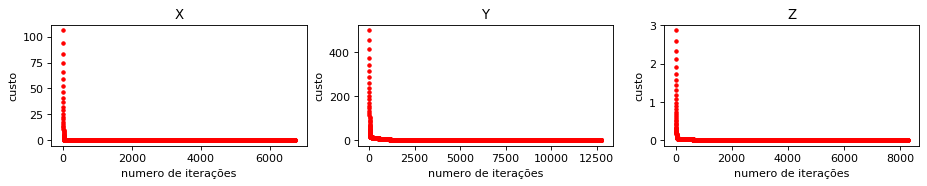

---------
Kick:  2  | index:  1


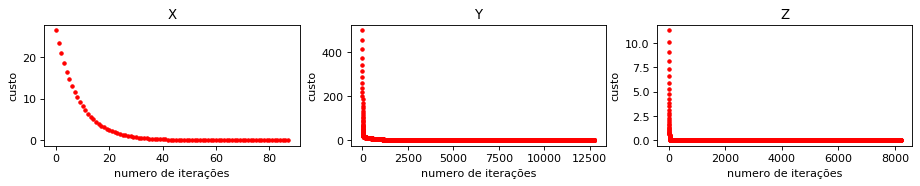

In [33]:
%matplotlib inline
print("Batch Gradient Descent - Cost Function")
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    fig = plt.figure(figsize=(14, 2), dpi=80)
    j = 1
    for dim in kick_data[i]:
        num_iterations = len(kick_data[i][dim]['linear_model']['cost']['GD'])
        ax = plt.subplot(1, 3, j)
        ax.plot(np.arange(0,num_iterations), kick_data[i][dim]['linear_model']['cost']['GD'], "r.")
        ax.set_ylabel('custo')
        ax.set_xlabel('numero de iterações')
        ax.set_title(dim)
        j = j + 1
    plt.show()

## Training - Polynomial Regression

### Stochastic Gradient Descent - Polynomial Regression

In [12]:
n_epochs = 10000
tol = 1e-6

for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    for dim in kick_data[i]:
        x = t[:,0] if dim == 'Y' else t
        y = kick_data[i][dim]['data']    
        starter_time = time.time()
        theta, cost = stochasticGradientDescent(x, y, eta0=7.5e-4, lr='opt', n_epochs=n_epochs, tol=tol) 
        time_1 = time.time() - starter_time

        num_iterations = len(cost)
        print("  training: ", dim)
        print("  - time of training linear regression with SGD: ", time_1)
        print("  - minimun cost: ", min(cost))
        print("  - num of iterations: ", num_iterations)
        print()

        kick_data[i][dim]['polynomial_model']['theta']['SGD'] = theta
        kick_data[i][dim]['polynomial_model']['cost']['SGD'] = cost

---------
Kick:  1  | index:  0
  training:  X
  - time of training linear regression with SGD:  0.02002239227294922
  - minimun cost:  [9.32822772e-07]
  - num of iterations:  217

  training:  Y
  - time of training linear regression with SGD:  0.2085118293762207
  - minimun cost:  [9.85657258e-07]
  - num of iterations:  2461

  training:  Z
  - time of training linear regression with SGD:  0.020998239517211914
  - minimun cost:  [9.73540001e-07]
  - num of iterations:  229

---------
Kick:  2  | index:  1
  training:  X
  - time of training linear regression with SGD:  0.014000415802001953
  - minimun cost:  [8.77889015e-07]
  - num of iterations:  157

  training:  Y
  - time of training linear regression with SGD:  0.21201252937316895
  - minimun cost:  [9.85657258e-07]
  - num of iterations:  2461

  training:  Z
  - time of training linear regression with SGD:  0.878706693649292
  - minimun cost:  [0.00017295]
  - num of iterations:  10000



Stochastic Gradient Descent - Cost Function
---------
Kick:  1  | index:  0


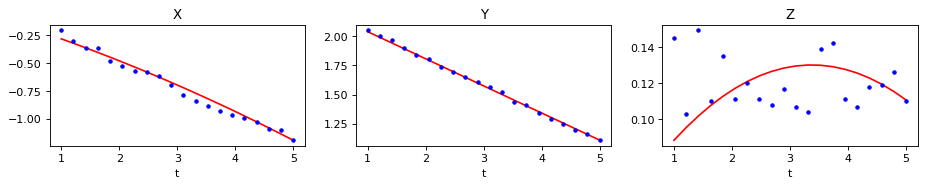

---------
Kick:  2  | index:  1


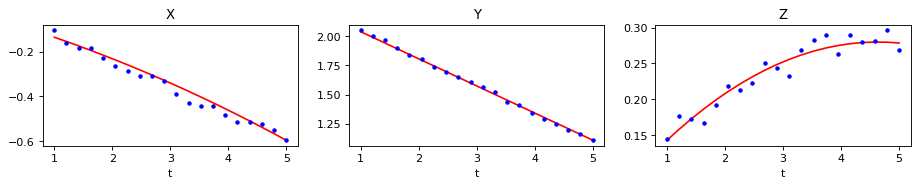

In [13]:
%matplotlib inline

t_line = np.linspace(1, 5, 20)
t_line = np.c_[t_line, t_line**2]
t_line = np.c_[np.ones((t_line.shape[0], 1)), t_line] 

print("Stochastic Gradient Descent - Cost Function")
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    fig = plt.figure(figsize=(14, 2), dpi=80)
    j = 1
    
    X_pol = t_line.dot(kick_data[i]['X']['polynomial_model']['theta']['SGD'])
    Y_pol = t_line[:,:2].dot(kick_data[i]['Y']['polynomial_model']['theta']['SGD'])
    Z_pol = t_line.dot(kick_data[i]['Z']['polynomial_model']['theta']['SGD'])

    ax = plt.subplot(1, 3, 1)
    ax.plot(t_line[:,1],X_pol,'r')
    ax.plot(t_line[:,1], kick_data[i]['X']['data'],'b.')
    ax.set_xlabel('t')
    ax.set_title('X')
    
    ax = plt.subplot(1, 3, 2)
    ax.plot(t_line[:,1],Y_pol,'r')
    ax.plot(t_line[:,1], kick_data[i]['Y']['data'],'b.')
    ax.set_xlabel('t')
    ax.set_title('Y')
    
    ax = plt.subplot(1, 3, 3)
    ax.plot(t_line[:,1],Z_pol,'r')
    ax.plot(t_line[:,1], kick_data[i]['Z']['data'],'b.')
    ax.set_xlabel('t')
    ax.set_title('Z')
    plt.show()

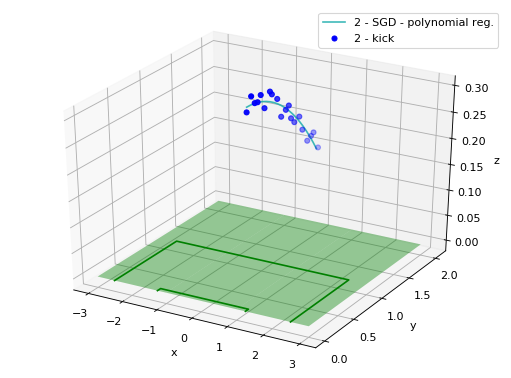

In [14]:
%matplotlib qt


fig = plt.figure(figsize=(8, 6), dpi=80)

ax = plt.axes(projection="3d")

# ax.scatter3D(Kick1.x, Kick1.y, Kick1.z, c='#10a9a9', label="1 - kick")

# kick two
ax.scatter3D(Kick2.x, Kick2.y, Kick2.z, c='#0000fa', label="2 - kick")

ax.plot(
    X_pol, 
    Y_pol, 
    Z_pol, 
    c='#10a9a9', 
    label='2 - SGD - polynomial reg.', 
    alpha=0.8
)

ax.legend()

# field
X_field,Y_field = np.meshgrid(np.linspace(-3,3,4), np.linspace(0,2,2))
Z_field = np.zeros(X_field.shape)
ax.plot_surface(X_field,Y_field,Z_field,shade=False, color='g', alpha=0.4)
ax.plot([-2.5 , -2.5, 2.5, 2.5], [0, 1, 1, 0], zdir ='z', zs=0, c='g')
ax.plot([-1.25, -1.25, 1.25, 1.25], [0, 0.05, 0.05, 0], zdir ='z', zs=0, c='g')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# ax.set_xlim(-3, 3)
# ax.set_ylim(0 ,2)
# ax.set_zlim(0, 0.5)

plt.show()

### Batch Gradient Descent - Polynomial Regression

In [25]:
n_epochs = 50000
tol = 1e-5
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    for dim in kick_data[i]:
        x = t[:,0] if dim == 'Y' else t
        y = kick_data[i][dim]['data']
        starter_time = time.time()
        theta, cost = gradientDescent(x, y, eta0=5e-3, lr='opt', n_epochs=n_epochs, tol=tol) 
        time_1 = time.time() - starter_time

        num_iterations = len(cost)
        print("training: ", dim)
        print("- time of training linear regression with GD: ", time_1)
        print("- minimun cost: ", min(cost))
        print("- num of iterations: ", num_iterations)
        print()

        kick_data[i][dim]['polynomial_model']['theta']['GD'] = theta
        kick_data[i][dim]['polynomial_model']['cost']['GD'] = cost

---------
Kick:  1  | index:  0
training:  X
- time of training linear regression with GD:  0.008999109268188477
- minimun cost:  9.919056559234317e-06
- num of iterations:  801

training:  Y
- time of training linear regression with GD:  0.06757426261901855
- minimun cost:  9.988245579230291e-06
- num of iterations:  10992

training:  Z
- time of training linear regression with GD:  0.16950583457946777
- minimun cost:  9.999437086327603e-06
- num of iterations:  24520

---------
Kick:  2  | index:  1
training:  X
- time of training linear regression with GD:  0.020783662796020508
- minimun cost:  9.935764062779062e-06
- num of iterations:  795

training:  Y
- time of training linear regression with GD:  0.07356834411621094
- minimun cost:  9.988245579230291e-06
- num of iterations:  10992

training:  Z
- time of training linear regression with GD:  0.015590190887451172
- minimun cost:  9.893597895708844e-06
- num of iterations:  1204



### Cost Function - Polynomial Regression

Stochastic Gradient Descent - Cost Function
---------
Kick:  1  | index:  0


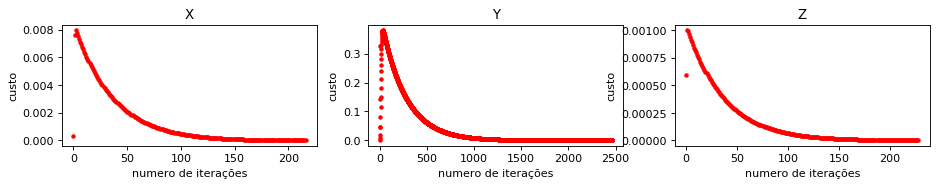

---------
Kick:  2  | index:  1


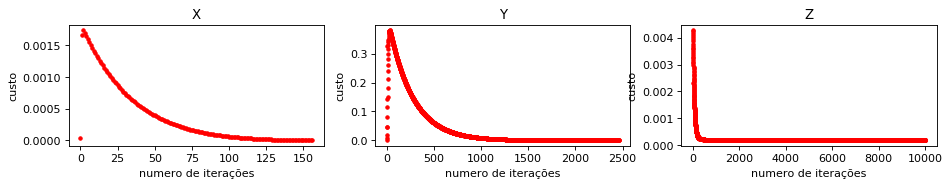

In [16]:
%matplotlib inline
print("Stochastic Gradient Descent - Cost Function")
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    fig = plt.figure(figsize=(14, 2), dpi=80)
    j = 1
    for dim in kick_data[i]:
        num_iterations = len(kick_data[i][dim]['polynomial_model']['cost']['SGD'])
        ax = plt.subplot(1, 3, j)
        ax.plot(np.arange(0,num_iterations), kick_data[i][dim]['polynomial_model']['cost']['SGD'], "r.")
        ax.set_ylabel('custo')
        ax.set_xlabel('numero de iterações')
        ax.set_title(dim)
        j = j + 1
    plt.show()

Batch Gradient Descent - Cost Function
---------
Kick:  1  | index:  0


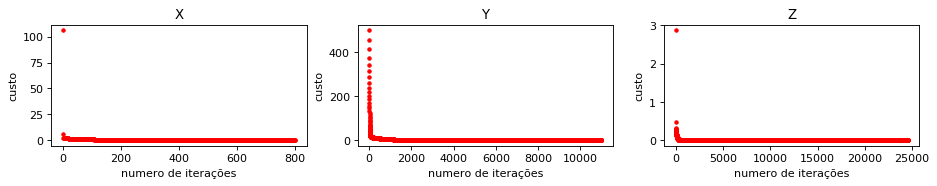

---------
Kick:  2  | index:  1


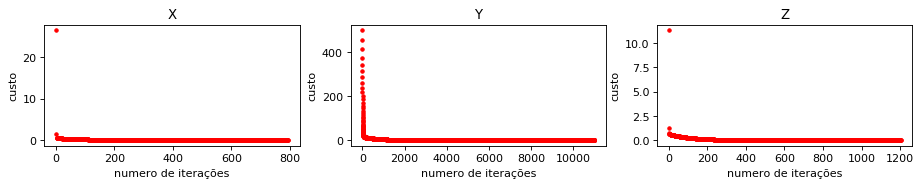

In [26]:
%matplotlib inline
print("Batch Gradient Descent - Cost Function")
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    fig = plt.figure(figsize=(14, 2), dpi=80)
    j = 1
    for dim in kick_data[i]:
        num_iterations = len(kick_data[i][dim]['polynomial_model']['cost']['GD'])
        ax = plt.subplot(1, 3, j)
        ax.plot(np.arange(0,num_iterations), kick_data[i][dim]['polynomial_model']['cost']['GD'], "r.")
        ax.set_ylabel('custo')
        ax.set_xlabel('numero de iterações')
        ax.set_title(dim)
        j = j + 1
    plt.show()

## Validating Model

In [34]:
def predictModel(X, Y, theta):
  X = np.c_[np.ones((X.shape[0], 1)), X] 
  predict_values = X.dot(theta)
  return predict_values

def meanSquaredError(Y_predicted, Y):
  error = 0
  m = len(Y_predicted)
  for i in range(m):
    error += ((Y_predicted[i] - Y[i])**2)
  return error/m

In [35]:
# t_line = np.linspace(1, 5, 20)
t_line = np.arange(1,20,0.05)
t_line = np.c_[t_line, t_line**2]

Kick_Model = []

for i in range(2):
    Kick_Model.append({
        'X' : {
            'linear_model': {
                'SGD': predictModel(t_line[:,0], kick_data[i]['X']['data'], kick_data[i]['X']['linear_model']['theta']['SGD']), 
                'GD' : predictModel(t_line[:,0], kick_data[i]['X']['data'], kick_data[i]['X']['linear_model']['theta']['GD'])
            },
            'polynomial_model': {
                'SGD': predictModel(t_line, kick_data[i]['X']['data'], kick_data[i]['X']['polynomial_model']['theta']['SGD']), 
                'GD' : predictModel(t_line, kick_data[i]['X']['data'], kick_data[i]['X']['polynomial_model']['theta']['GD'])
            }
        },
        'Y' : {
            'linear_model': {
                'SGD': predictModel(t_line[:,0], kick_data[i]['Y']['data'], kick_data[i]['Y']['linear_model']['theta']['SGD']), 
                'GD' : predictModel(t_line[:,0], kick_data[i]['Y']['data'], kick_data[i]['Y']['linear_model']['theta']['GD'])
            },
            'polynomial_model': {
                'SGD': predictModel(t_line[:,0], kick_data[i]['Y']['data'], kick_data[i]['Y']['polynomial_model']['theta']['SGD']), 
                'GD' : predictModel(t_line[:,0], kick_data[i]['Y']['data'], kick_data[i]['Y']['polynomial_model']['theta']['GD'])
            }
        },
        'Z' : {
            'linear_model': {
                'SGD': predictModel(t_line[:,0], kick_data[i]['Z']['data'], kick_data[i]['Z']['linear_model']['theta']['SGD']), 
                'GD' : predictModel(t_line[:,0], kick_data[i]['Z']['data'], kick_data[i]['Z']['linear_model']['theta']['GD'])
            },
            'polynomial_model': {
                'SGD': predictModel(t_line, kick_data[i]['Z']['data'], kick_data[i]['Z']['polynomial_model']['theta']['SGD']), 
                'GD' : predictModel(t_line, kick_data[i]['Z']['data'], kick_data[i]['Z']['polynomial_model']['theta']['GD'])
            }
        }
    })

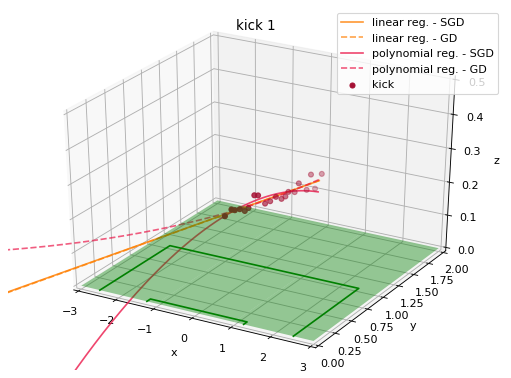

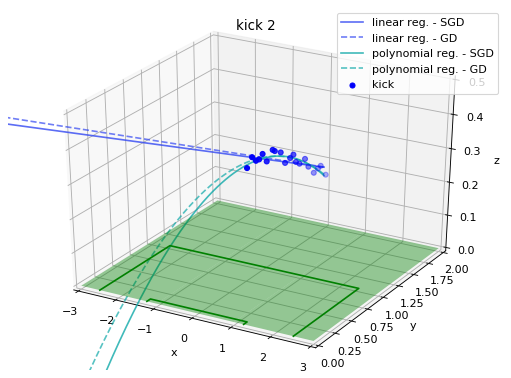

In [44]:
%matplotlib qt

color_schema = [
    {
        'points' : '#a51134',
        'linear' : '#ff7f00',
        'polynomial' : '#eb184a'
    },
    {
        'points' : '#0000fa',
        'linear' : '#3348f2',
        'polynomial' : '#10a9a9'
    }
]

for i in range(2):
    fig = plt.figure(figsize=(8, 6), dpi=80)
    ax = plt.axes(projection="3d")
    
    # plot kick data
    ax.scatter3D(
        kick_data[i]['X']['data'], 
        kick_data[i]['Y']['data'], 
        kick_data[i]['Z']['data'],
        c=color_schema[i]['points'], 
        label="kick"
    )
    
    # plot linear model
    ax.plot3D(
        Kick_Model[i]['X']['linear_model']['SGD'], 
        Kick_Model[i]['Y']['linear_model']['SGD'], 
        Kick_Model[i]['Z']['linear_model']['SGD'], 
        c=color_schema[i]['linear'], 
        label='linear reg. - SGD', 
        alpha=0.8
    )
    ax.plot3D(
        Kick_Model[i]['X']['linear_model']['GD'], 
        Kick_Model[i]['Y']['linear_model']['GD'], 
        Kick_Model[i]['Z']['linear_model']['GD'], 
        '--',
        c=color_schema[i]['linear'], 
        label='linear reg. - GD', 
        alpha=0.7
    )
    
    #plot polynomial model
    ax.plot3D(
        Kick_Model[i]['X']['polynomial_model']['SGD'], 
        Kick_Model[i]['Y']['polynomial_model']['SGD'], 
        Kick_Model[i]['Z']['polynomial_model']['SGD'], 
        c=color_schema[i]['polynomial'], 
        label='polynomial reg. - SGD', 
        alpha=0.8
    )
    ax.plot3D(
        Kick_Model[i]['X']['polynomial_model']['GD'], 
        Kick_Model[i]['Y']['polynomial_model']['GD'], 
        Kick_Model[i]['Z']['polynomial_model']['GD'], 
        '--',
        c=color_schema[i]['polynomial'], 
        label='polynomial reg. - GD', 
        alpha=0.7
    )

    # ax.plot(X_pol, Z_pol, zdir='y', zs=2, alpha=.25, c='k')
    # ax.plot(Y_pol, Z_pol, zdir='x', zs=-3, alpha=.25, c='k')
    # ax.plot(X_pol, Y_pol, zdir='z', zs=0, alpha=.25, c='k')

    ax.legend()

    # field
    X_field,Y_field = np.meshgrid(np.linspace(-3,3,4), np.linspace(0,2,2))
    Z_field = np.zeros(X_field.shape)
    ax.plot_surface(X_field,Y_field,Z_field,shade=False, color='g', alpha=0.4)
    ax.plot([-2.5 , -2.5, 2.5, 2.5], [0, 1, 1, 0], zdir ='z', zs=0, c='g')
    ax.plot([-1.25, -1.25, 1.25, 1.25], [0, 0.05, 0.05, 0], zdir ='z', zs=0, c='g')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.set_xlim(-3, 3)
    ax.set_ylim(0 ,2)
    ax.set_zlim(0, 0.5)
    
    title = 'kick ' + str(i+1)
    ax.set_title(title)

    plt.show()